In [1]:
import cv2
import dlib
import numpy
import matplotlib.pyplot as plt

rectangles[] [] []
None


TypeError: Image data cannot be converted to float

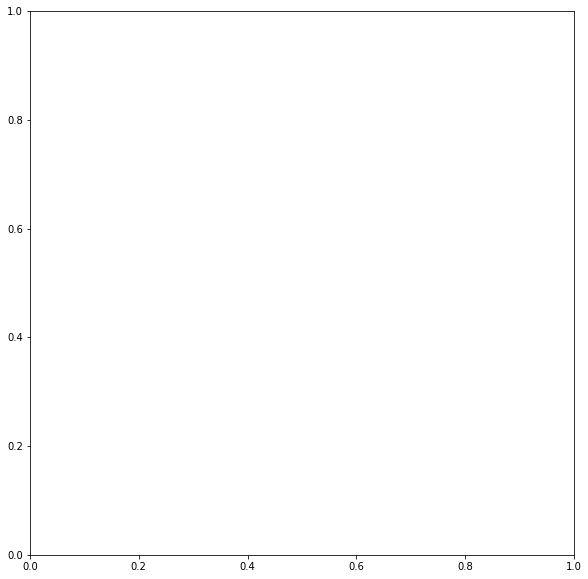

In [13]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 10.0)
# 学習済みモデルをpredictorに適用
PREDICTOR_PATH = "shape_predictor_68_face_landmarks.dat"
predictor = dlib.shape_predictor(PREDICTOR_PATH)

def get_landmarks(image):
    detector = dlib.get_frontal_face_detector()
    # RGB変換 (opencv形式からskimage形式に変換)
    image_rgb = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    # frontal_face_detectorクラスは矩形, スコア, サブ検出器の結果を返す
    dets, scores, idx = detector.run(image, 0)
    print(dets, scores, idx)
    landmarks_list = []
    if len(dets) > 0:
        for i, rect in enumerate(dets):
            shape = predictor(image_rgb, rect).parts()
            landmarks = numpy.matrix([[p.x, p.y] for p in shape])
            landmarks_list.append(landmarks)
        image = image.copy()
        
        # landmarkを画像に書き込む
        for landmarks in landmarks_list:
            for idx, point in enumerate(landmarks):
                pos = (point[0,0], point[0,1])
                #cv2.putText(image, str(idx), pos, fontFace=cv2.FONT_HERSHEY_SCRIPT_SIMPLEX, fontScale=0.3, color=(255,0,0))
                cv2.circle(image,pos,2,color=(255,255,0))
        return image
    
    else:
        print('None')

if __name__=='__main__':
    image=cv2.imread('facebook_films/kusaka.jpg')
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    plt.imshow(get_landmarks(gray))
    
    
    